# Fraud Detection (PayPal)

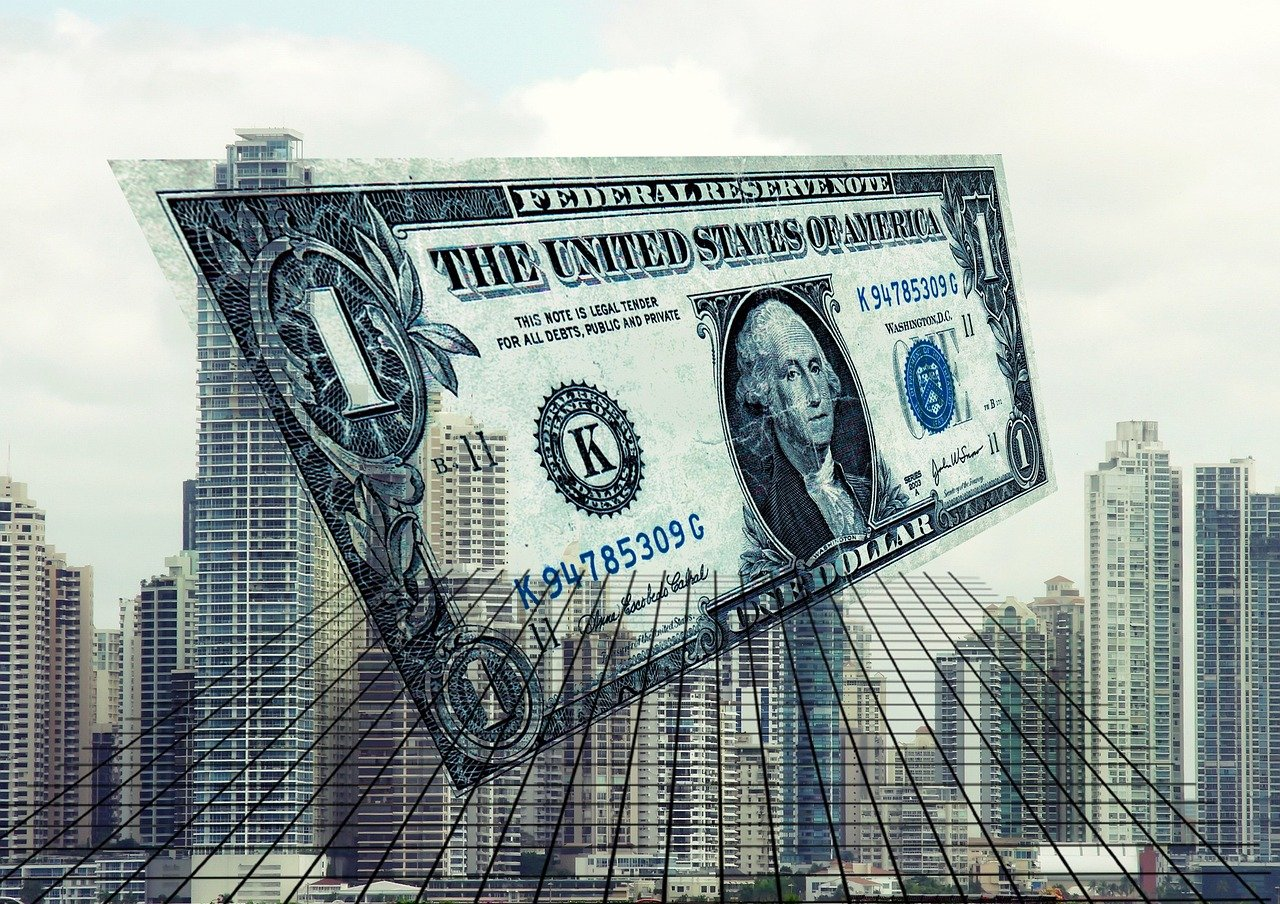 Image by <a href="https://pixabay.com/users/geralt-9301/?utm_source=link-attribution&utm_medium=referral&utm_campaign=image&utm_content=1313623">Gerd Altmann</a> from <a href="https://pixabay.com//?utm_source=link-attribution&utm_medium=referral&utm_campaign=image&utm_content=1313623">Pixabay</a>

Credit card companies must recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. Credit card fraud is a fascinating subject for data scientists because of the enormous data sets, real and costly business implications, and potential to solve significant business problems that save millions and millions of dollars/pounds/euros/money.

In global efforts to understand and improve machine learning models and data analysis approaches, some datasets have been made open source.

For this project, you will use a somewhat de-identified dataset of credit card transactions in Europe. The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced. The positive class (frauds) accounts for 0.172% of all transactions.

## Installations

In [41]:
!pip install xgboost

In [42]:
!pip install seaborn

In [43]:
!pip install scikit-learn

In [44]:
!pip install imbalanced-learn

## Importing Needed Libraries

In [45]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc
import joblib

## Data Collection / Cleaning

In [46]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [47]:
file_path = "/content/drive/MyDrive/Data Science/DS Projects/my_paypal_creditcard.csv"
df = pd.read_csv(file_path)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [48]:
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:\n", df.describe())

Dataset Shape: (284807, 31)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20  

In [49]:
print("\nMissing Values:\n", df.isnull().sum().sum())
print("Duplicated Rows:\n", df.duplicated().sum())


Missing Values:
 0
Duplicated Rows:
 1081


## Data Exploration / Visualization

#### Checking class distribution

In [50]:
print("\nClass Distribution:")
print(df['Class'].value_counts())


Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64


In [51]:
print("\nClass Distribution Percentage:")
print(df['Class'].value_counts(normalize=True) * 100)


Class Distribution Percentage:
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


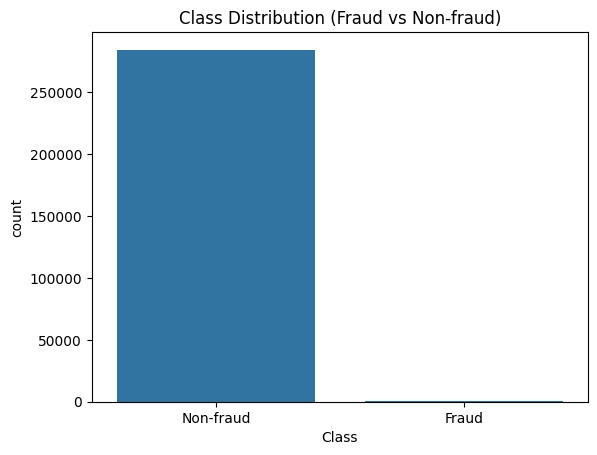

In [52]:
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (Fraud vs Non-fraud)')
plt.xticks([0,1],['Non-fraud','Fraud'])
plt.show()

In [53]:
df.groupby('Class')['Amount'].sum().reset_index()

,Class,Amount
0,0,25102462.04
1,1,60127.97


#### Correlation Matrix

In [54]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


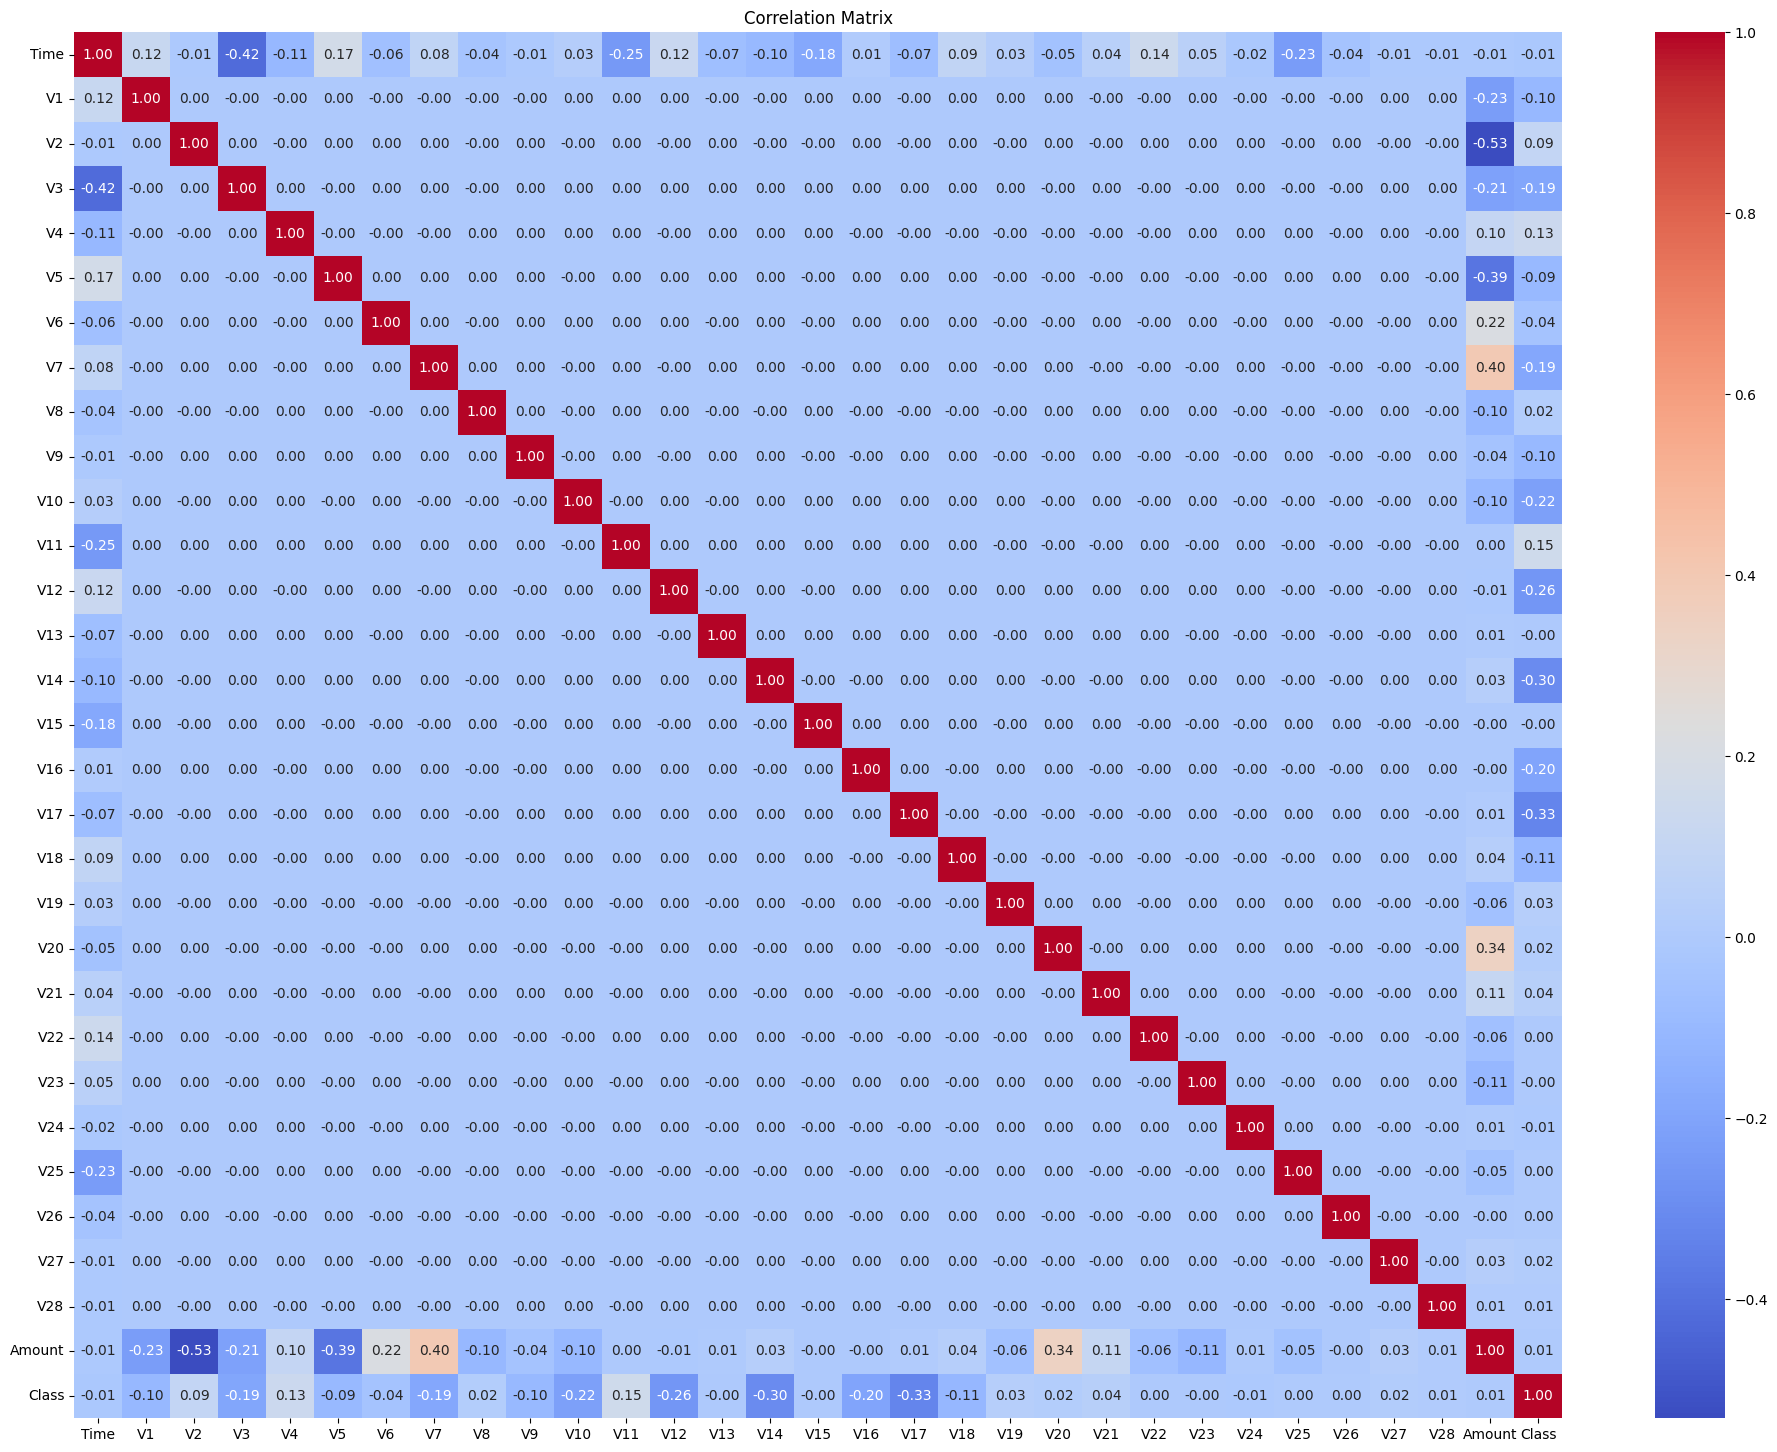

In [55]:
plt.figure(figsize=(24, 18))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [56]:
df.corr()['Class'].sort_values(ascending=False)

,Class
Class,1.000000
V11,0.154876
V4,0.133447
V2,0.091289
V21,0.040413
V19,0.034783
V20,0.020090
V8,0.019875
V27,0.017580
V28,0.009536


## Machine Learning

#### Preprocessing

In [57]:
# feature scaling
cols = ['Time','Amount']
scaler = StandardScaler()
df[cols] = scaler.fit_transform(df[cols])

In [58]:
# handling imbalance with SMOTE
X = df.drop('Class', axis=1)
y = df['Class']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert back to dataframe
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Class'] = y_resampled

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

### Modeling

#### Logistic Regression

In [60]:
# model training
Log_model = LogisticRegression()
Log_model.fit(X_train, y_train)

LogisticRegression()

In [61]:
# model evaluation
y_pred_log = Log_model.predict(X_test)
print(classification_report(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     56750
           1       0.97      0.92      0.95     56976

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726

[[55368  1382]
 [ 4429 52547]]


AUPRC: 0.9910


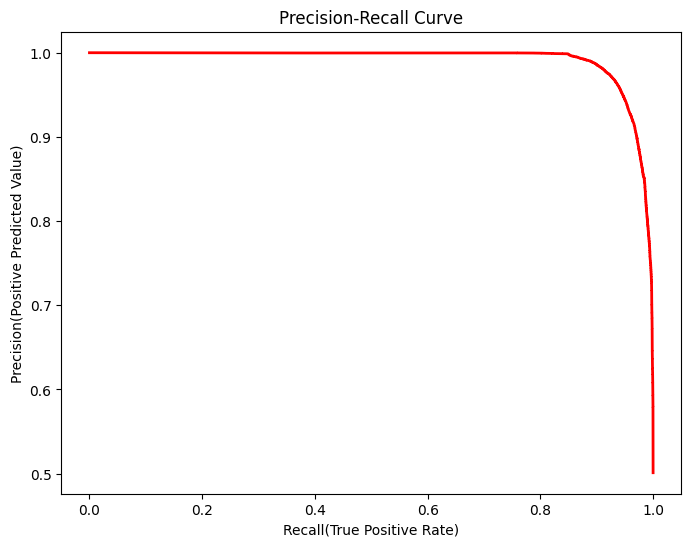

In [62]:
# precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, Log_model.predict_proba(X_test)[:, 1])
print(f"AUPRC: {auc(recall, precision):.4f}")
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='red', lw=2)
plt.xlabel('Recall(True Positive Rate)')
plt.ylabel('Precision(Positive Predicted Value)')
plt.title('Precision-Recall Curve')
plt.show()

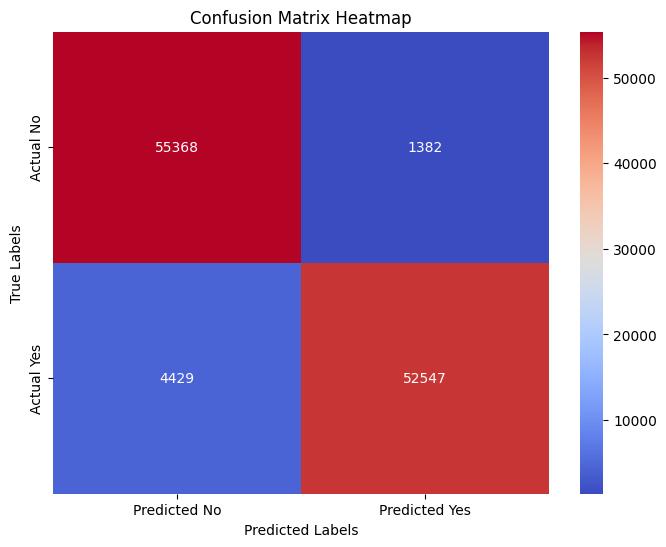

In [63]:
# confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='coolwarm', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

#### Random Forest Classifier

In [64]:
# model training
RFC_model = RandomForestClassifier(n_estimators=100, random_state=42)
RFC_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [65]:
# model evaluation
y_pred_rfc = RFC_model.predict(X_test)
print(classification_report(y_test, y_pred_rfc))
print(confusion_matrix(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

[[56739    11]
 [    0 56976]]


AUPRC: 1.0000


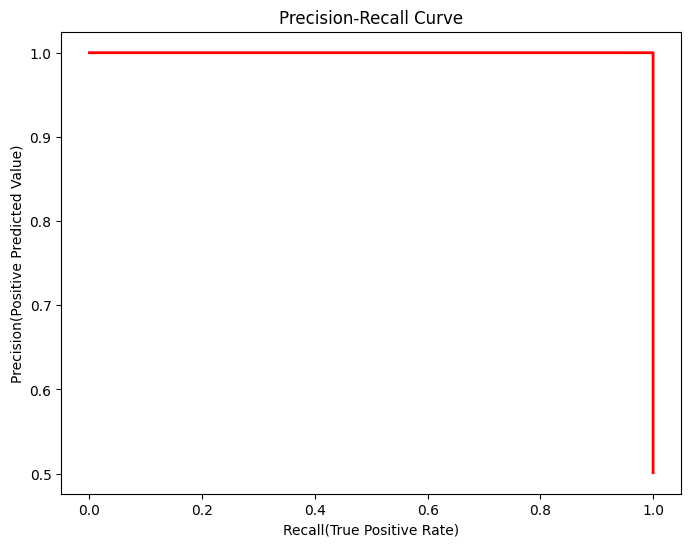

In [66]:
# precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, RFC_model.predict_proba(X_test)[:, 1])
print(f"AUPRC: {auc(recall, precision):.4f}")
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='red', lw=2)
plt.xlabel('Recall(True Positive Rate)')
plt.ylabel('Precision(Positive Predicted Value)')
plt.title('Precision-Recall Curve')
plt.show()

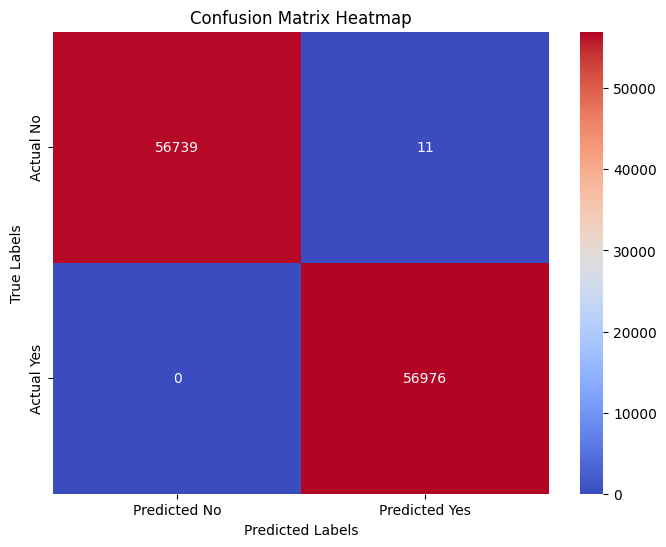

In [67]:
# confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred_rfc)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='coolwarm', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

#### XGBoost Classifier

In [68]:
# model training
XGB_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
XGB_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:08:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [69]:
# model evaluation
y_pred_xgb = XGB_model.predict(X_test)
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

[[56720    30]
 [    0 56976]]


AUPRC: 1.0000


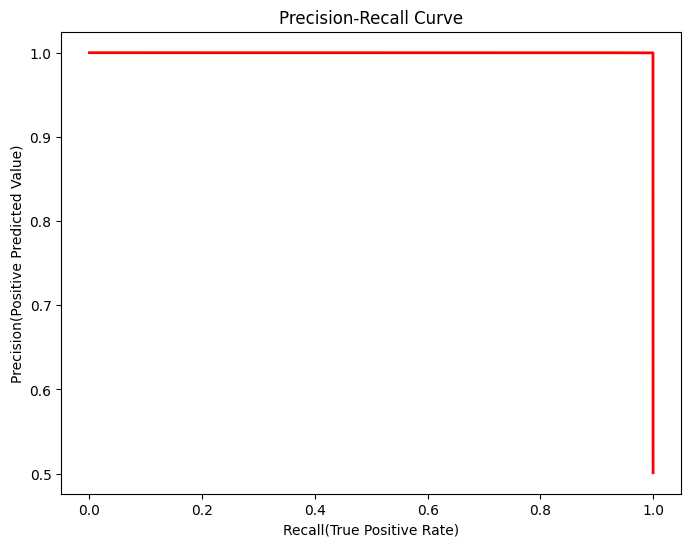

In [70]:
# precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, XGB_model.predict_proba(X_test)[:, 1])
print(f"AUPRC: {auc(recall, precision):.4f}")
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='red', lw=2)
plt.xlabel('Recall(True Positive Rate)')
plt.ylabel('Precision(Positive Predicted Value)')
plt.title('Precision-Recall Curve')
plt.show()

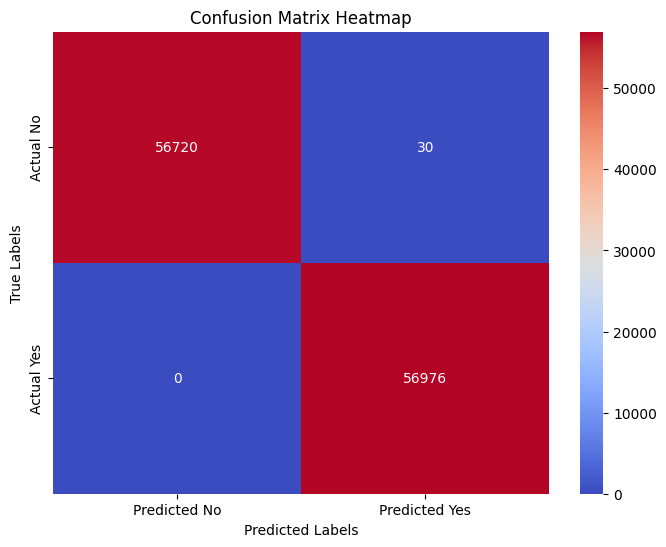

In [71]:
# confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='coolwarm', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

### Model for Deployment

In [72]:
joblib.dump(RFC_model, 'Fraud Detection Model.pkl')

['Fraud Detection Model.pkl']